In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from sklearn import preprocessing
%matplotlib inline

In [6]:
df = pd.read_csv('emails.csv')

In [7]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [8]:
df.shape

(5728, 2)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [11]:
df.shape

(5695, 2)

In [12]:
X= df.text.values
y= df.spam.values

In [13]:
#Dataset splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=1)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv=CountVectorizer()

In [16]:
Xtrain=cv.fit_transform(X_train)

In [17]:
Xtrain.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
from sklearn.naive_bayes import MultinomialNB

#Create a Gaussian Classifier
mnb = MultinomialNB()

In [20]:
#Train the model using the training sets
mnb.fit(Xtrain, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
Xtest=cv.transform(X_test)
Xtest.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
pred=mnb.predict(Xtest)

In [23]:
mnb.score(Xtest,y_test)

0.9943820224719101

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
accuracy_score(y_test,pred)

0.9943820224719101

In [25]:
confusion_matrix(y_test,pred)

array([[1073,    4],
       [   4,  343]])

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1077
           1       0.99      0.99      0.99       347

   micro avg       0.99      0.99      0.99      1424
   macro avg       0.99      0.99      0.99      1424
weighted avg       0.99      0.99      0.99      1424



Text(0.5, 257.44, 'Predicted label')

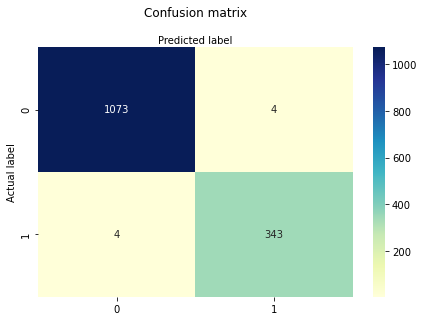

In [27]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
seaborn.heatmap(pd.DataFrame(confusion_matrix(y_test,pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
mail=['I have attached documents','Hello']
m=cv.transform(mail)


In [35]:
mnb.predict(m)

array([0, 0])